## Gabriel Teixeira Lima Aracena & Alexander Crayton

## CST 425

### Import Data

In [45]:
import pandas as pd

df = pd.read_csv('data/Male-Teamsport-CMJ-Data.csv')

### Display Some Data

In [46]:
df.head()

,Name,ExternalId,Test Type,Date,Time,BW [KG],Reps,Tags,Additional Load [lb],Jump Height (Imp-Mom) [cm],...,Eccentric Mean Power / BM [W/kg],Flight Time:Contraction Time,Jump Height (Flight Time) [cm],Start of Braking Phase [s],Total Work [J],Concentric RFD - 100ms [N/s],Concentric RFD / BM [N/s/kg],Eccentric Braking RFD / BM [N/s/kg],Eccentric Peak Power / BM [W/kg],Eccentric:Concentric Duration [%]
0,Carter Young,NaN,CMJ,4/1/2024,9:34 AM,70.61,2,NaN,0,44.2,...,7.21,1.03,50.9,182.300,801.0,-3848.0,5.3,134.0,27.2,186.6
1,Dustin Crenshaw,NaN,CMJ,4/1/2024,9:34 AM,82.90,2,NaN,0,37.7,...,8.12,0.66,45.2,32.463,1112.0,-3155.0,0.0,56.0,24.2,208.5
2,Cooper Neville,NaN,CMJ,4/1/2024,9:33 AM,78.43,2,NaN,0,39.8,...,10.11,0.83,45.5,15.422,1046.0,-4710.0,17.5,93.0,31.5,162.4
3,Cade Verdusco,NaN,CMJ,4/1/2024,9:28 AM,78.99,1,NaN,0,42.9,...,5.72,0.94,47.1,16.105,812.0,918.0,37.6,104.0,17.2,244.0
4,Bryan Webb,NaN,CMJ,4/1/2024,9:28 AM,85.44,2,NaN,0,44.9,...,7.05,1.24,50.0,22.628,877.0,-3716.0,33.9,203.0,36.6,180.4


### Cull data we don't want to use

In [47]:
df_new = df.drop(columns=['Name', 'ExternalId', 'Test Type', 'Date', 'Time', 'Reps', 'Tags', 'Additional Load [lb]', 'RSI-modified [m/s] ', 'Jump Height (Flight Time) [cm] ', 'Start of Braking Phase [s] '])

### Remove any row with null values, then check to make sure we don't have any null values

In [48]:
df_new = df_new.dropna()
print(df_new.isnull().sum())

BW [KG]                                 0
Jump Height (Imp-Mom) [cm]              0
Peak Power / BM [W/kg]                  0
Peak Power [W]                          0
Concentric Duration [ms]                0
Concentric Impulse [N s]                0
Eccentric Braking RFD [N/s]             0
Eccentric Braking Impulse [N s]         0
Eccentric Duration [ms]                 0
Eccentric Mean Power [W]                0
Eccentric Mean Power / BM [W/kg]        0
Flight Time:Contraction Time            0
Total Work [J]                          0
Concentric RFD - 100ms [N/s]            0
Concentric RFD / BM [N/s/kg]            0
Eccentric Braking RFD / BM [N/s/kg]     0
Eccentric Peak Power / BM [W/kg]        0
Eccentric:Concentric Duration [%]       0
dtype: int64


# Remove rows where BW [KG] is equal to or less than zero

In [49]:
df_new = df_new[df_new["BW [KG]"] > 0]

### Generate histogram for cultivated features

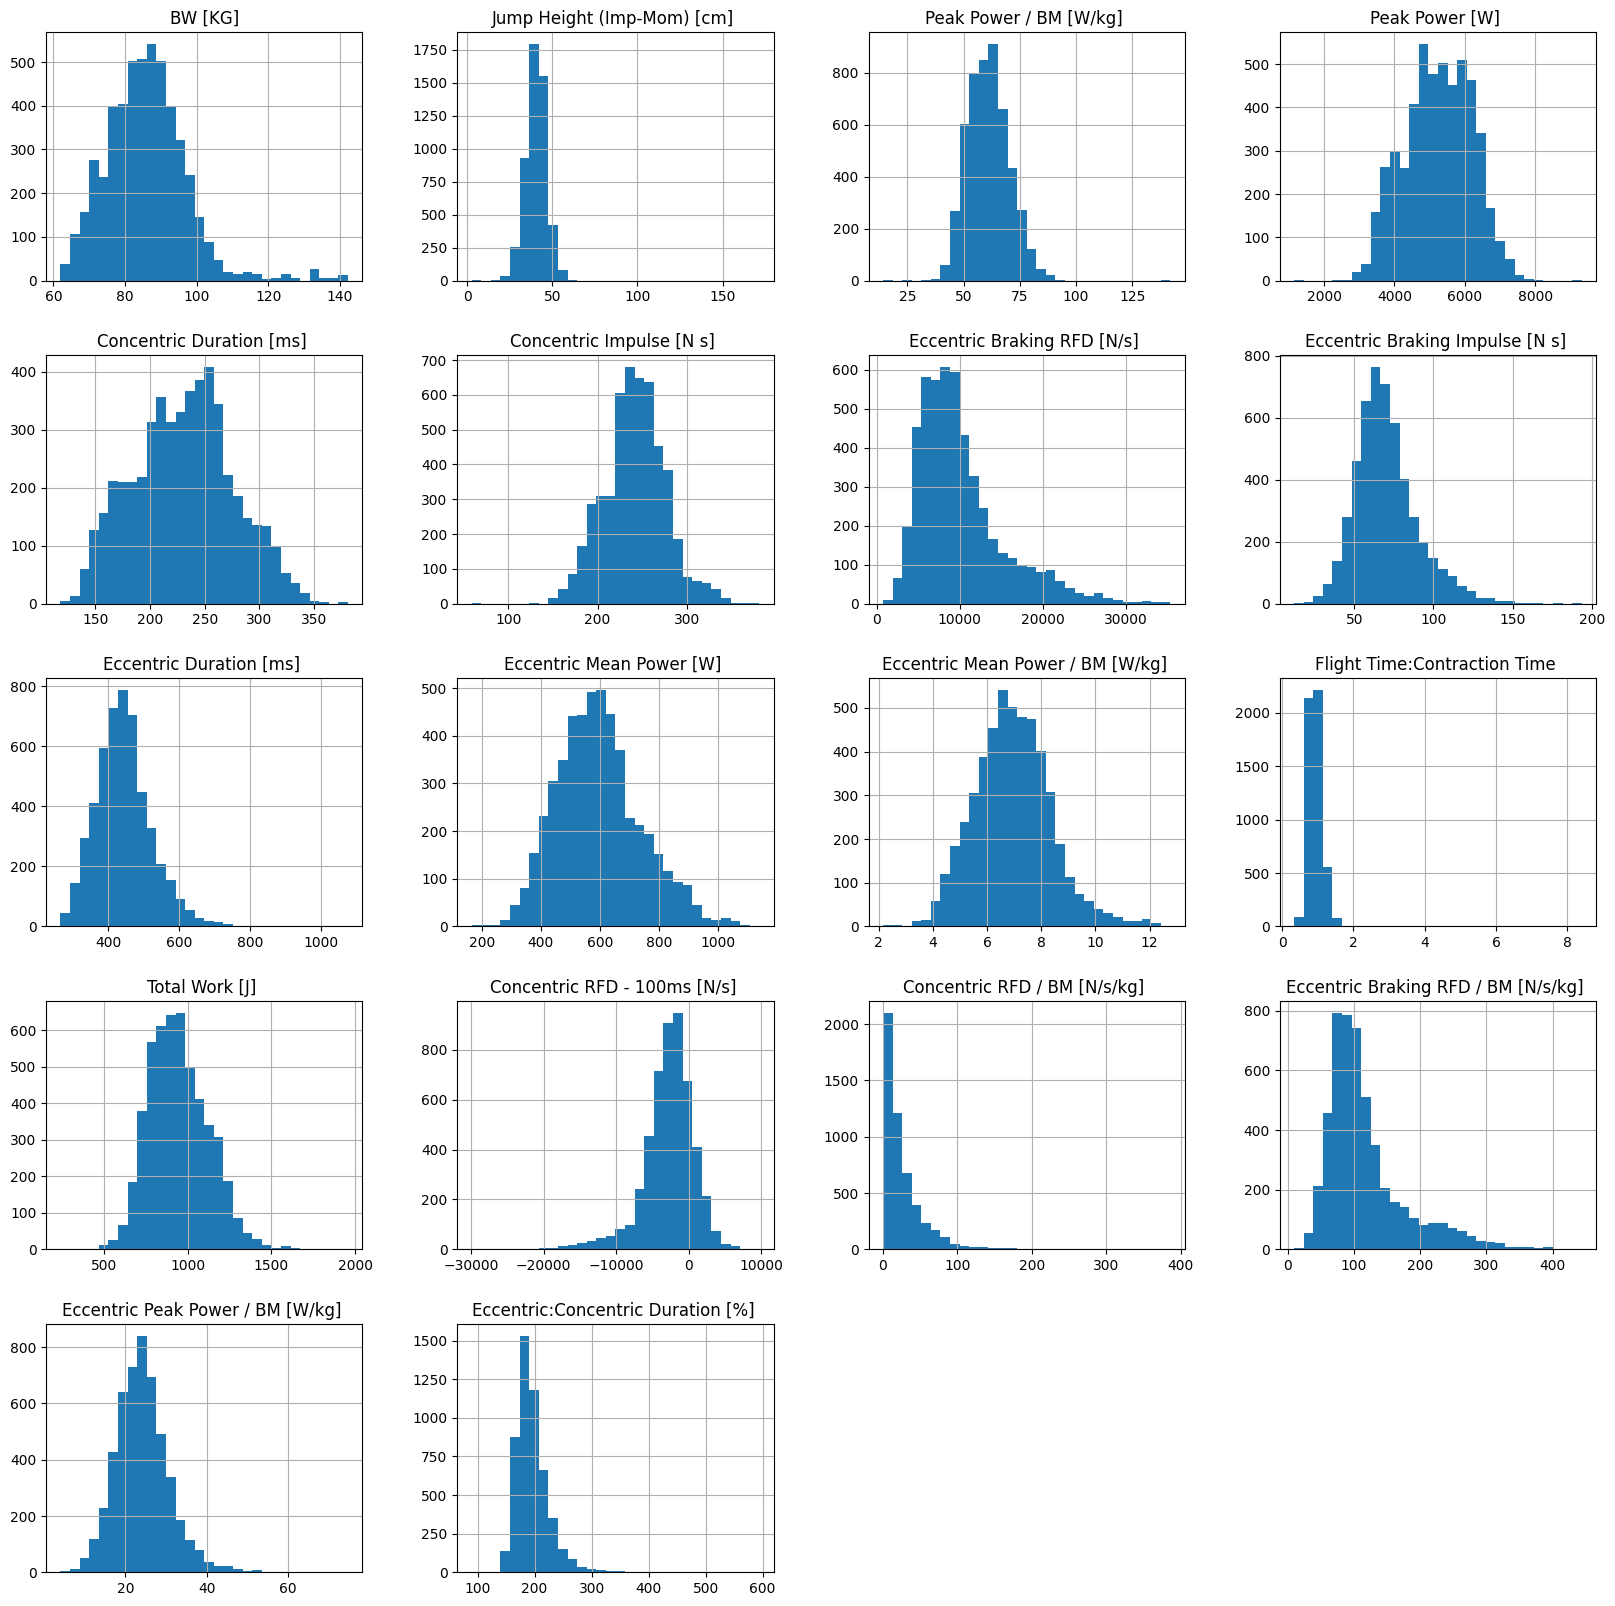

In [50]:
import matplotlib.pyplot as plt

df_new.hist(bins=30, figsize=(20, 20))
plt.show()

## Initial Histogram Visual Analysis
Visual anaylsis shows that the distribution of most features approximates a normal distribution, though there is a noticeable right skew in the eccentric and concentric features.

## Plot cultivated features vs. Peak Power / BM [W/kg]

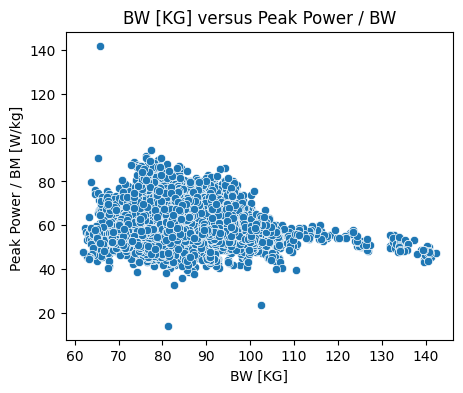

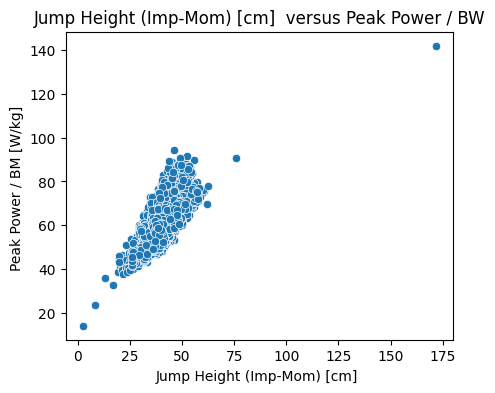

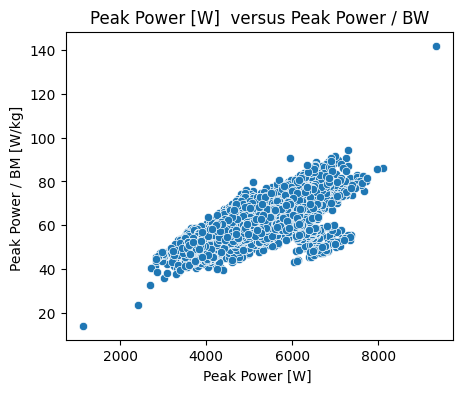

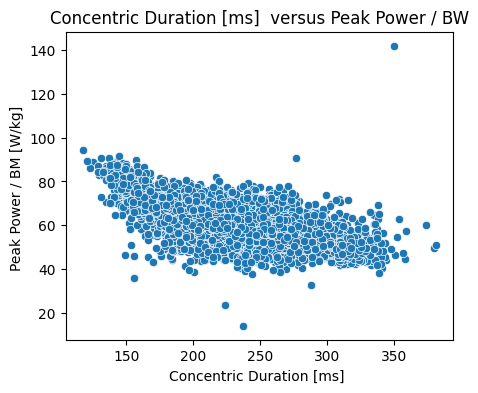

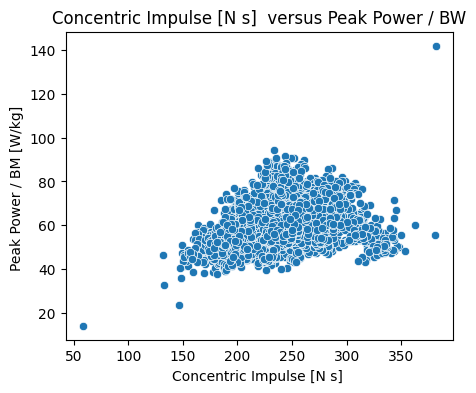

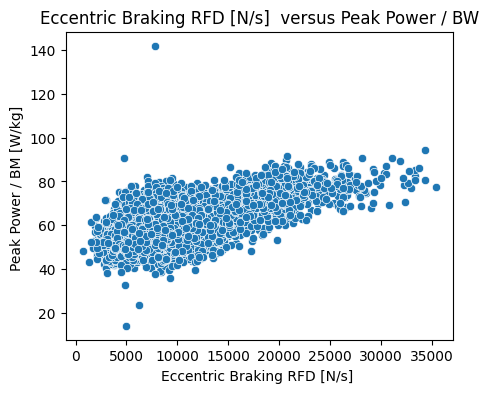

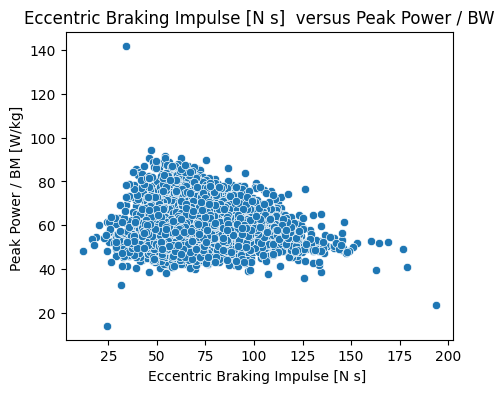

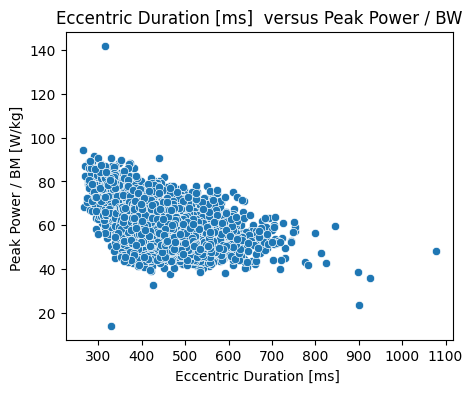

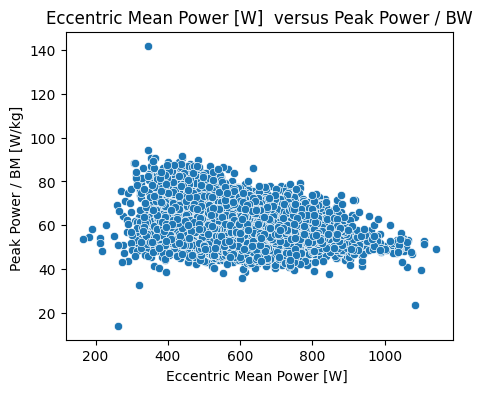

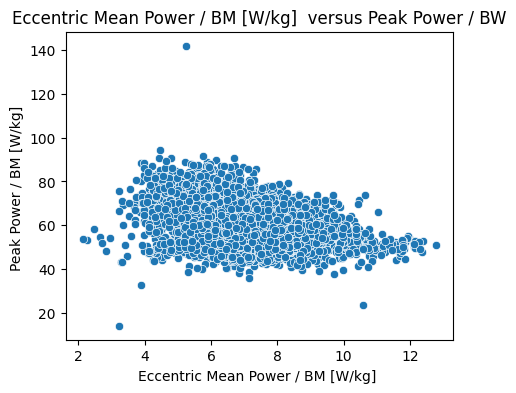

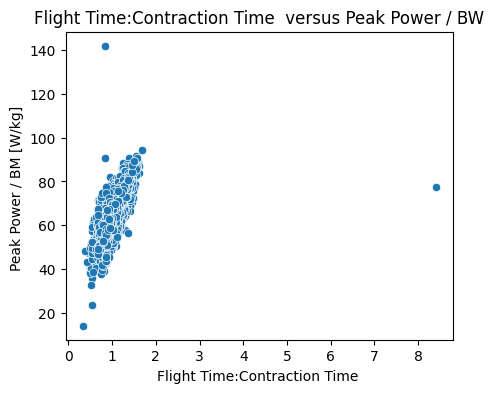

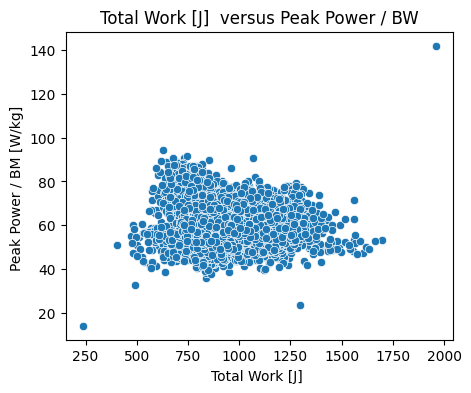

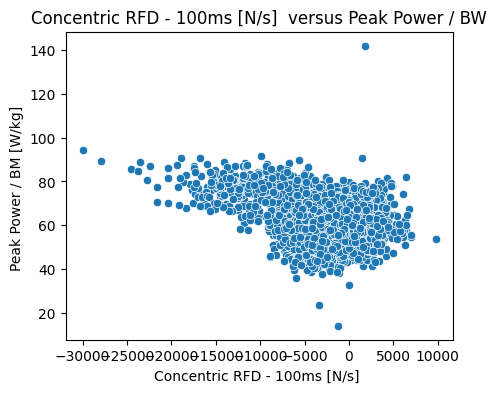

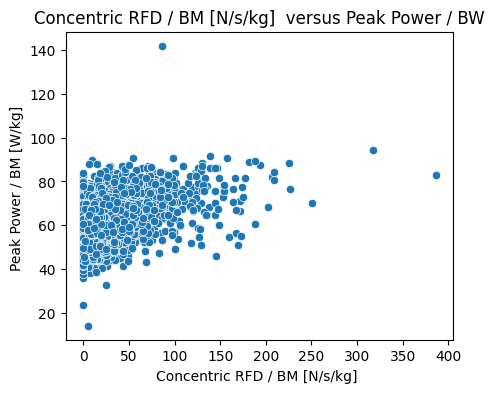

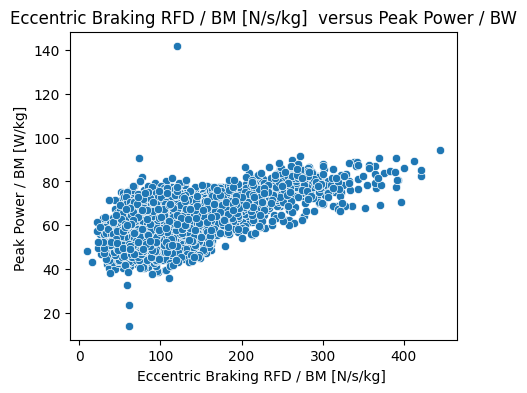

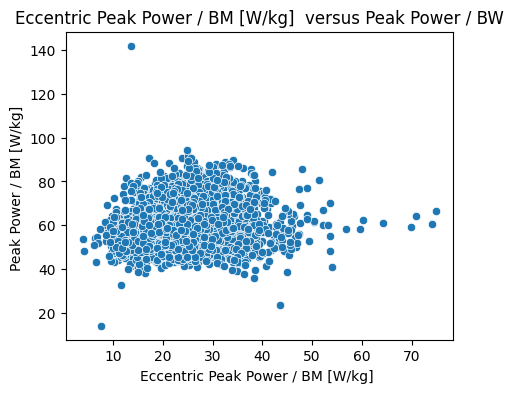

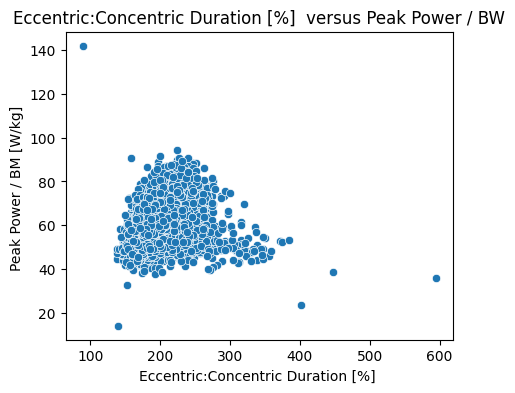

In [51]:
import seaborn as sns

for column in df_new.columns: # plot relationship between feature and target feature, "Peak Power / BW"
    if column != 'Peak Power / BM [W/kg] ':
        plt.figure(figsize=(5, 4))
        sns.scatterplot(data=df_new, x=column, y='Peak Power / BM [W/kg] ')
        plt.title(f'{column} versus Peak Power / BW')
        plt.show()

## Relationship Graph Analysis

* We can already see that there is a strong positive relationship between the jump height and the Peak Power / BW, this makes sense since we can assume that atheltes that are able to generate more power per body weight will most likely jump higher, I don't think this is very beneficial for our research, instead just an obvious result.
* There seems to be a slight negative relationship between concentric time and Peak Power / BW, meaning that the higher the concentric time an athletes has before they jump the less power they are generating per body weight, probably because large concentric duration are syunopnym opf less explosiveness.
* Eccentric breaking on the other hand seems to have a slight positive trend with Peak Power / BW, so the more the eccentric breaking value an athletes produce the slightly better Peak Power / BW they will produce.
* There seems to be a very high positive relationship between Peak Power / BW and "Flight Time: Contraction Time" but since I do not understand this feature too well so far I do not want to make any conclusions.  

## Display Correlation Matrix

For reference:

- Values that approach +1 indicate a strong positive linear relationship between the variables. They are represented by shades of red. A deeper red indicates a stronger negative relationship.
- Values that approach -1 indicate a strong negative linear relationship between the variables. They are represented by shades of blue. A deeper blue indicates a stronger negative relationship.
- Values near zero indicate no linear relationship between the variables. They are repesented by have a color close to white or a neutral shade.

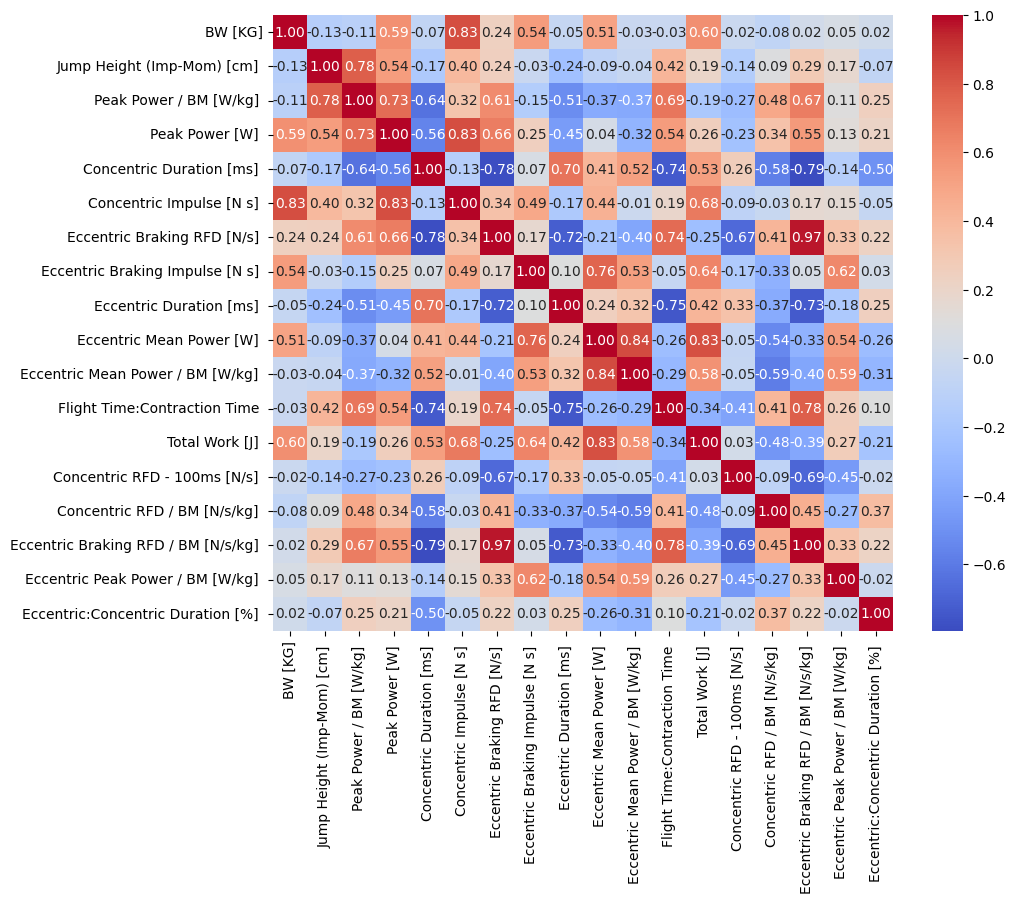

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_new.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Graph Analysis


## Heat Map Analysis

The heatmap matrix valeus seem to support our initial analysis provided above

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
X = newdf.drop('Peak Power / BM [W/kg] ', axis=1)
y = newdf['Peak Power / BM [W/kg] ']

# Handle missing values if any
# For demonstration, filling missing values with the mean (implement based on your EDA)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting and Evaluating the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1.052621334800362
R2 Score: 0.9870693507377349


## Feature Importance

In [ ]:
# Extract coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Sort the coefficients by their absolute values
coefficients['Absolute'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values('Absolute', ascending=False)

# Display the sorted coefficients
print(sorted_coefficients)

                                      Coefficient   Absolute
Peak Power [W]                          11.006635  11.006635
Eccentric Braking RFD [N/s]             -9.500354   9.500354
Eccentric Braking RFD / BM [N/s/kg]      9.385905   9.385905
RSI-modified [m/s]                       7.839189   7.839189
Jump Height (Flight Time) [cm]          -7.634849   7.634849
Eccentric Mean Power [W]                -4.196413   4.196413
Eccentric Mean Power / BM [W/kg]         3.800676   3.800676
Concentric Impulse [N s]                -3.028908   3.028908
Jump Height (Imp-Mom) [cm]               2.243673   2.243673
Eccentric Duration [ms]                  0.958911   0.958911
Concentric Duration [ms]                -0.720241   0.720241
Eccentric:Concentric Duration [%]       -0.511083   0.511083
Flight Time:Contraction Time            -0.332910   0.332910
Eccentric Peak Power / BM [W/kg]        -0.170870   0.170870
Concentric RFD / BM [N/s/kg]             0.147345   0.147345
Total Work [J]          

In [ ]:
X_scaled = scaler.fit_transform(X)

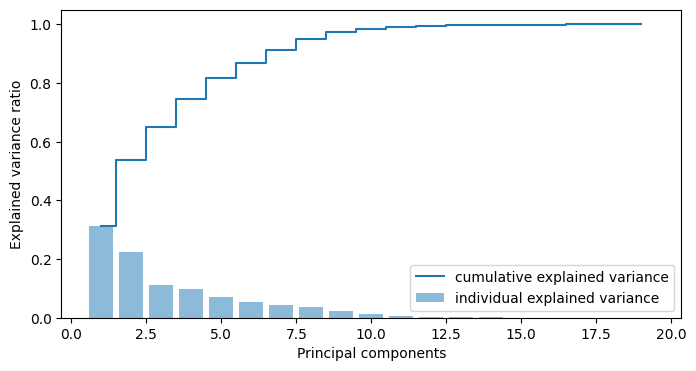

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the Explained Variance to understand how many components to retain
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(explained_variance), where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

In [ ]:
plt.show()

In [ ]:
# Deciding on the number of components to keep
# Example: Keep the number of components that explain 95% of the variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.where(cumulative_variance > 0.95)[0][0] + 1

print(f"Number of components to keep for 95% variance: {n_components}")

Number of components to keep for 95% variance: 9


In [ ]:
# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

In [ ]:
# Splitting the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)

In [ ]:
# Training the Linear Regression model
model2 = LinearRegression()
model2.fit(X_train_2, y_train_2)

LinearRegression()

In [ ]:
# Predicting and Evaluating the model
y_pred_2 = model2.predict(X_test_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)

print("Mean Squared Error:", mse_2)
print("R2 Score:", r2_2)

Mean Squared Error: 5.755552262898712
R2 Score: 0.9292974356858404


In [ ]:
# Display loadings for each component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)
print(loadings)

                                           PC1       PC2       PC3       PC4  \
Jump Height (Imp-Mom) [cm]            0.154090 -0.151433 -0.007778  0.255295   
RSI-modified [m/s]                    0.106262 -0.034645  0.643087  0.115107   
Peak Power [W]                        0.277547 -0.218908 -0.145589  0.376672   
Concentric Duration [ms]             -0.365375 -0.041608  0.089341  0.020945   
Concentric Impulse [N s]              0.116502 -0.332513 -0.134736  0.432010   
Eccentric Braking RFD [N/s]           0.370945 -0.126111 -0.104075 -0.124008   
Eccentric Braking Impulse [N s]      -0.026443 -0.405310 -0.058960 -0.033375   
Eccentric Duration [ms]              -0.314344  0.028181  0.026425  0.192307   
Eccentric Mean Power [W]             -0.170633 -0.413717  0.006024 -0.038894   
Eccentric Mean Power / BM [W/kg]     -0.230525 -0.304783  0.100397 -0.261247   
Flight Time:Contraction Time          0.359705 -0.071892  0.260371 -0.034611   
Jump Height (Flight Time) [cm]        0.